In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 5GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/most-popular-programming-languages-since-2004/Most Popular Programming Languages from 2004 to 2020.csv


In [2]:
#Importing required Libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
#Reading the csv file using pandas
data = pd.read_csv(r'/kaggle/input/most-popular-programming-languages-since-2004/Most Popular Programming Languages from 2004 to 2020.csv')

#Convering the date to Datetime data type
data['Date'] = pd.to_datetime(data['Date'])

#Setting date as index
data.set_index('Date', inplace = True)

#Displying first few lines of the dataset
data.head()

,Abap,Ada,C/C++,C#,Cobol,Dart,Delphi,Go,Groovy,Haskell,...,PHP,Python,R,Ruby,Rust,Scala,Swift,TypeScript,VBA,Visual Basic
Date,,,,,,,,,,,,,,,,,,,,,
2004-07-01,0.36,0.38,9.97,4.86,0.44,0.0,2.89,0.0,0.03,0.23,...,18.77,2.60,0.40,0.35,0.08,0.03,0.0,0.0,1.49,8.84
2004-08-01,0.37,0.38,9.65,5.20,0.48,0.0,2.78,0.0,0.07,0.21,...,18.88,2.75,0.42,0.41,0.10,0.03,0.0,0.0,1.52,8.96
2004-09-01,0.43,0.43,9.46,5.29,0.53,0.0,2.77,0.0,0.08,0.22,...,18.93,2.84,0.42,0.43,0.11,0.03,0.0,0.0,1.62,8.82
2004-10-01,0.42,0.39,9.16,5.43,0.55,0.0,2.84,0.0,0.09,0.21,...,18.92,2.99,0.43,0.47,0.12,0.04,0.0,0.0,1.65,8.70
2004-11-01,0.39,0.39,9.37,5.40,0.57,0.0,2.85,0.0,0.08,0.25,...,19.02,2.93,0.43,0.46,0.14,0.04,0.0,0.0,1.55,8.50


# Looking for null values

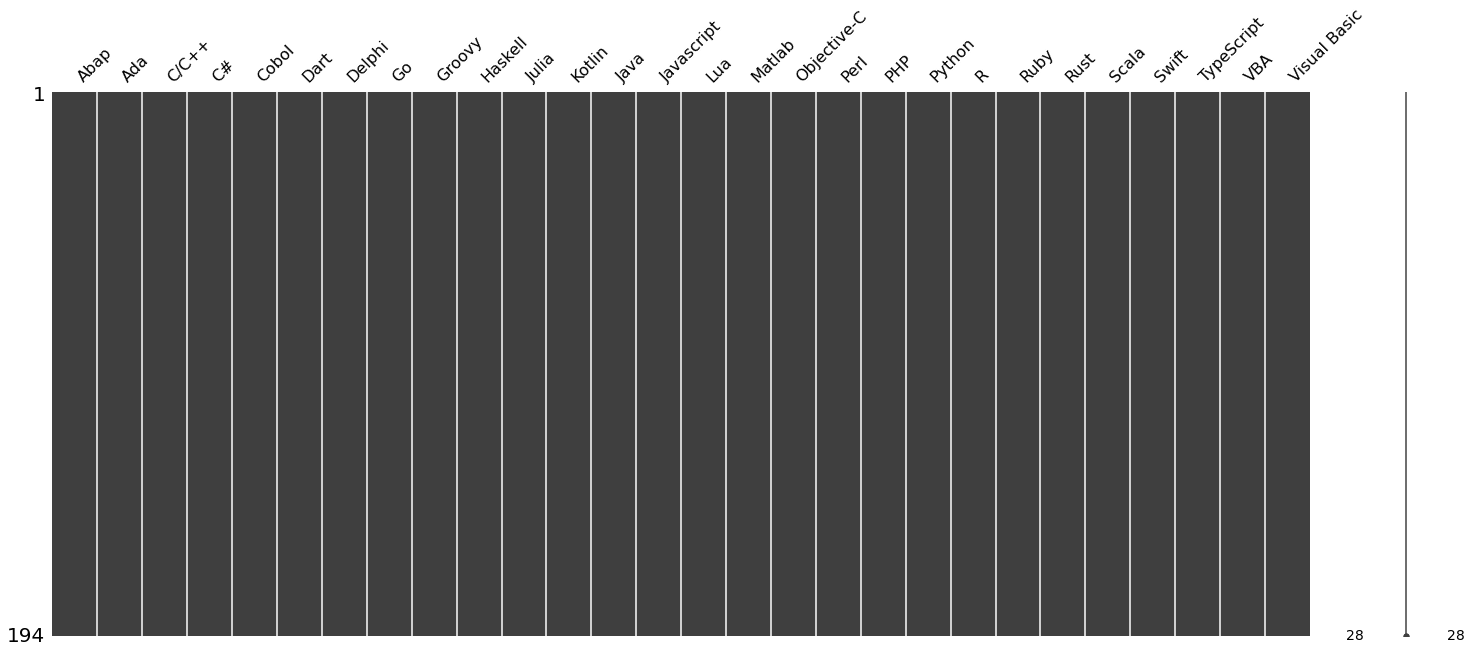

In [4]:
import missingno as miss

miss.matrix(data)

* We can see that there are no missing values in the data.
* Now, we can move to the visualization step.

In [5]:
data.describe()

,Abap,Ada,C/C++,C#,Cobol,Dart,Delphi,Go,Groovy,Haskell,...,PHP,Python,R,Ruby,Rust,Scala,Swift,TypeScript,VBA,Visual Basic
count,194.000000,194.000000,194.000000,194.000000,194.000000,194.000000,194.000000,194.000000,194.000000,194.000000,...,194.000000,194.000000,194.000000,194.000000,194.000000,194.000000,194.000000,194.000000,194.000000,194.000000
mean,0.498814,0.295928,8.412010,7.647268,0.383969,0.100825,1.098299,0.272371,0.330722,0.301598,...,14.505825,11.063093,2.029691,2.160670,0.206959,0.528299,1.055103,0.405309,1.701701,3.857062
std,0.102133,0.079515,1.778675,1.309938,0.073387,0.116980,0.764734,0.395568,0.139438,0.038870,...,4.727871,7.989862,1.311785,0.694323,0.179043,0.442681,1.388318,0.640866,0.323910,2.192946
min,0.320000,0.170000,5.720000,4.860000,0.250000,0.000000,0.220000,0.000000,0.030000,0.210000,...,5.780000,2.600000,0.390000,0.350000,0.050000,0.010000,0.000000,0.000000,1.190000,0.820000
25%,0.400000,0.230000,7.630000,6.600000,0.320000,0.000000,0.390000,0.000000,0.252500,0.280000,...,10.917500,5.147500,0.835000,1.667500,0.080000,0.130000,0.000000,0.000000,1.460000,1.662500
50%,0.500000,0.285000,8.025000,7.355000,0.380000,0.110000,0.890000,0.065000,0.370000,0.300000,...,15.025000,8.155000,1.730000,2.510000,0.120000,0.405000,0.000000,0.010000,1.630000,3.880000
75%,0.580000,0.350000,9.152500,8.927500,0.440000,0.130000,1.737500,0.365000,0.447500,0.320000,...,19.205000,13.685000,3.407500,2.660000,0.302500,1.000000,2.460000,0.595000,1.832500,5.357500
max,0.730000,0.540000,12.980000,10.000000,0.580000,0.570000,2.890000,1.390000,0.520000,0.400000,...,20.320000,31.880000,4.190000,3.010000,0.910000,1.350000,3.590000,1.960000,2.550000,8.960000


In [6]:
#DataFrame Information
data.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 194 entries, 2004-07-01 to 2020-08-01
Data columns (total 28 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Abap          194 non-null    float64
 1   Ada           194 non-null    float64
 2   C/C++         194 non-null    float64
 3   C#            194 non-null    float64
 4   Cobol         194 non-null    float64
 5   Dart          194 non-null    float64
 6   Delphi        194 non-null    float64
 7   Go            194 non-null    float64
 8   Groovy        194 non-null    float64
 9   Haskell       194 non-null    float64
 10  Julia         194 non-null    float64
 11  Kotlin        194 non-null    float64
 12  Java          194 non-null    float64
 13  Javascript    194 non-null    float64
 14  Lua           194 non-null    float64
 15  Matlab        194 non-null    float64
 16  Objective-C   194 non-null    float64
 17  Perl          194 non-null    float64
 18  PHP        

* For visualization I'm including only those programming languages whose mean value is greater than 2.5.
* And I'm doing this using the result as boolean mask.

In [7]:
mask = data.mean() > 2.5

data = data.loc[:, mask]

clms = data.columns.tolist()
clms

['C/C++',
 'C#',
 'Java',
 'Javascript',
 'Matlab',
 'Objective-C',
 'Perl',
 'PHP',
 'Python',
 'Visual Basic']

* The above clms list showing our top 10 programming languages.

# Visualization

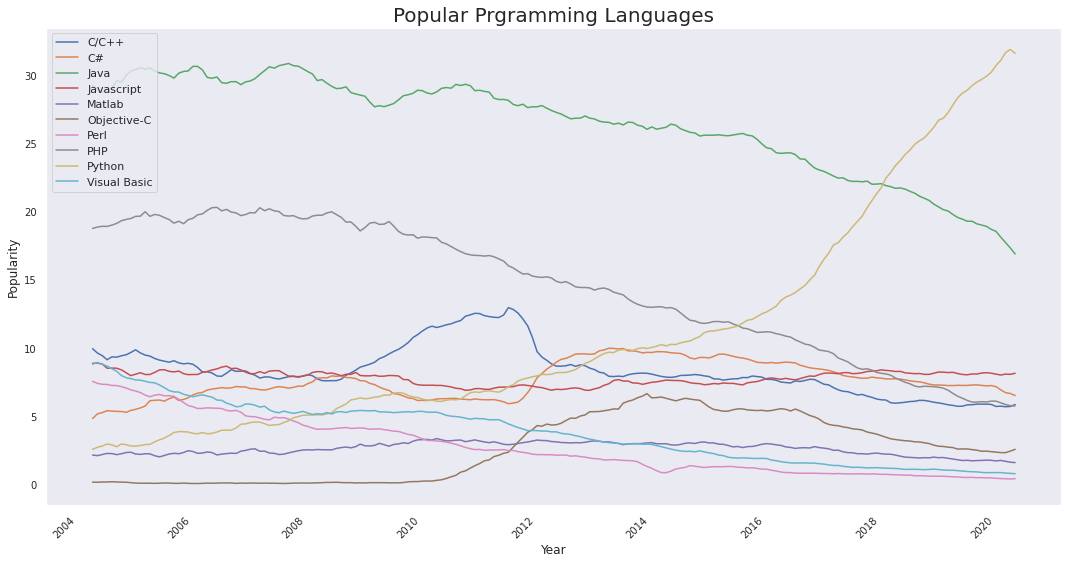

In [8]:
#%matplotlib notebook
#pd.plotting.register_matplotlib_converters()
 
plt.figure(figsize = (15, 8))
sns.set(style = 'dark')

for language in clms:
    sns.lineplot(x = data.index, y = data[language], label = language)

plt.ylabel('Popularity', fontsize = 12)
plt.xlabel('Year', fontsize = 12)
plt.title('Popular Prgramming Languages', fontsize = 20)
plt.legend(loc = 2)
plt.yticks(fontsize = 10)
plt.xticks(rotation = 45, fontsize = 10)
plt.tight_layout()
plt.show()